In [16]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression

import wrangle

from pydataset import data

1) Load the tips dataset from either pydataset or seaborn.

In [11]:
tips = data('tips')

2) Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.



In [12]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [17]:
# split my tips data
train, validate, test = wrangle.split_continuous(tips)

train -> (136, 8)
validate -> (59, 8)
test -> (49, 8)


In [22]:
# generate parameters, i.e. create model
ols_model = LinearRegression().fit(train[['total_bill']], train['tip'])

# compute predictions and add to original dataframe
train['yhat'] = ols_model.predict(train[['total_bill']])

train.head(3)

,total_bill,tip,sex,smoker,day,time,size,yhat
19,16.97,3.50,Female,No,Sun,Dinner,3,2.741254
173,7.25,5.15,Male,Yes,Sun,Dinner,2,1.642824
119,12.43,1.80,Female,No,Thur,Lunch,2,2.228201


In [33]:
# Establish Baseline
train['yhat_baseline'] = train['tip'].mean()

3) Plot the residuals for the linear regression model that you made.

In [23]:
train['residual'] = train['yhat'] - train['tip']

In [35]:
# Establish residual baseline
train['residual_baseline'] = train['yhat_baseline'] - train['tip']

In [36]:
train.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,residual,yhat_baseline,residual_baseline
19,16.97,3.50,Female,No,Sun,Dinner,3,2.741254,-0.758746,2.946985,-0.553015
173,7.25,5.15,Male,Yes,Sun,Dinner,2,1.642824,-3.507176,2.946985,-2.203015
119,12.43,1.80,Female,No,Thur,Lunch,2,2.228201,0.428201,2.946985,1.146985
29,21.70,4.30,Male,No,Sat,Dinner,2,3.275778,-1.024222,2.946985,-1.353015
238,32.83,1.17,Male,Yes,Sat,Dinner,2,4.533548,3.363548,2.946985,1.776985


<AxesSubplot:xlabel='total_bill', ylabel='residual'>

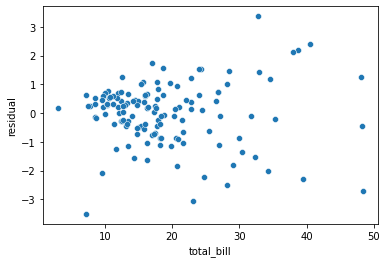

In [27]:
sns.scatterplot(data=train, x="total_bill", y="residual")

<AxesSubplot:ylabel='Frequency'>

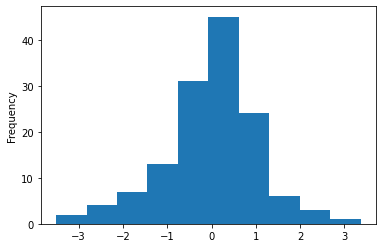

In [43]:
train.residual.plot.hist()

<AxesSubplot:ylabel='Frequency'>

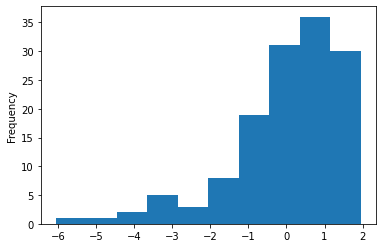

In [45]:
train.residual_baseline.plot.hist()

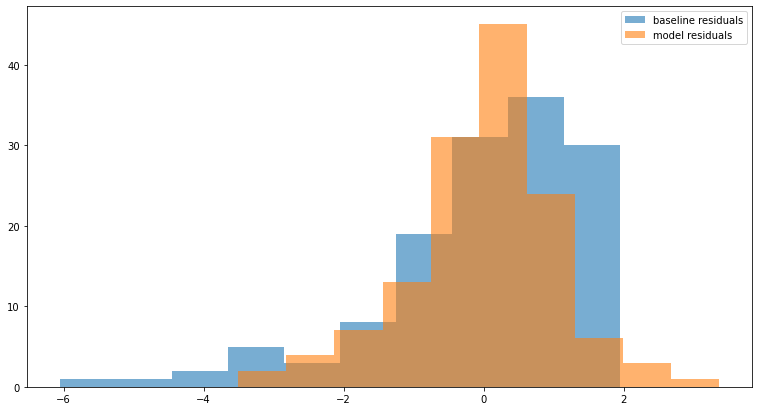

In [46]:
fig, ax = plt.subplots(figsize=(13, 7))

ax.hist(train.residual_baseline, label='baseline residuals', alpha=.6)
ax.hist(train.residual, label='model residuals', alpha=.6)
ax.legend()

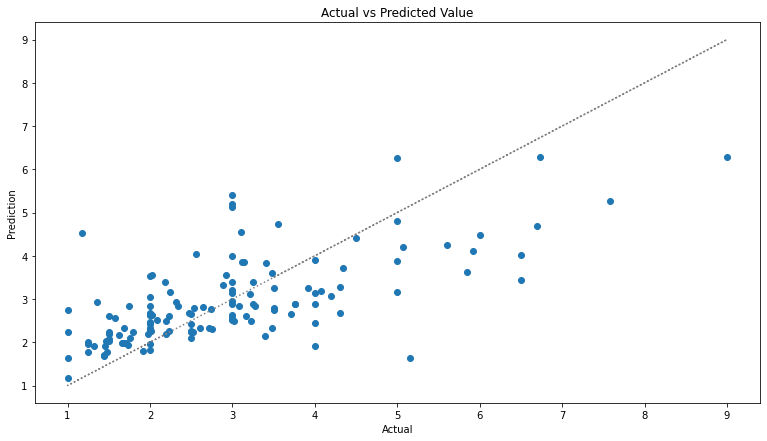

In [48]:
fig, ax = plt.subplots(figsize=(13, 7))
ax.scatter(train.tip, train.yhat, label='predicted')
ax.set(title='Actual vs Predicted Value', ylabel='Prediction', xlabel='Actual')
ax.plot(train.tip, train.tip, ls=':', c='gray')

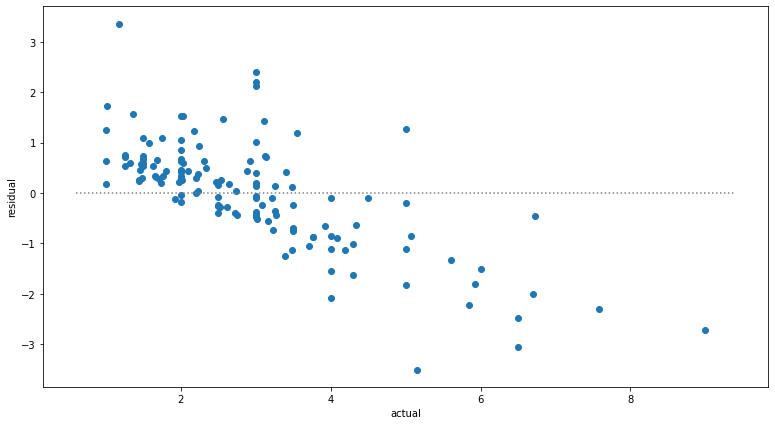

In [50]:
fig, ax = plt.subplots(figsize=(13, 7))

ax.scatter(train.tip, train.residual)
ax.set(ylabel='residual', xlabel='actual')
ax.hlines(0, *ax.get_xlim(), ls=':', color='gray')

4) Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [51]:
from sklearn.metrics import r2_score, mean_squared_error

In [40]:
#Calculate SSE

# square each residual value
train['residual^2'] = train.residual ** 2

train['residual_baseline^2'] = train.residual_baseline ** 2

# SSE
SSE = sum(train['residual^2'])
SSE_baseline = sum(train['residual_baseline^2'])

print("SSE = ", SSE)
print("SSE - baseline = ", SSE_baseline)

SSE =  153.53663973018618
SSE - baseline =  286.43166397058826


In [41]:
SSE2 = mean_squared_error(train.tip, train.yhat)*len(train)
SSE2_baseline = mean_squared_error(train.tip, train.yhat_baseline)*len(train)

print("SSE manual == SSE sklearn: ", SSE == SSE2) 
print("SSE manual - baseline == SSE sklearn - baseline: ", SSE_baseline == SSE2_baseline) 

SSE manual == SSE sklearn:  False
SSE manual - baseline == SSE sklearn - baseline:  True
